Predict Attrition of your valuable employees


This table contains 1470 rows and 35 columns


IBM HR Analytics Employee Attrition & Performance

### Business Problem
IBM is an American multinational technology company and they wants to know why employees are leaving the company
(Fictional dataset)

### Objective
The company wants to understand what factors contributed most to employee turnover and to create a model that can predict 
if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on 
targeted employees. Overall, the implementation of this model will allow management to create better decision-making 
actions.

### Problem Definition
In this study, we will attempt to solve the following problem statement is:

What is the likelihood of an active employee leaving the company?

What are the key indicators of an employee leaving the company?

What strategies can be adopted based on the results to improve employee retention?

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
import statsmodels.api as sm

from sklearn import metrics

# Libraries for data modelling
from sklearn import tree

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

In [28]:
hr_df = pd.read_csv("HR-Employee-Attrition.csv")
df = hr_df.copy()

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
df.shape

(1470, 35)

In [31]:
df.shape  #Columns removed

(1470, 35)

In [32]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

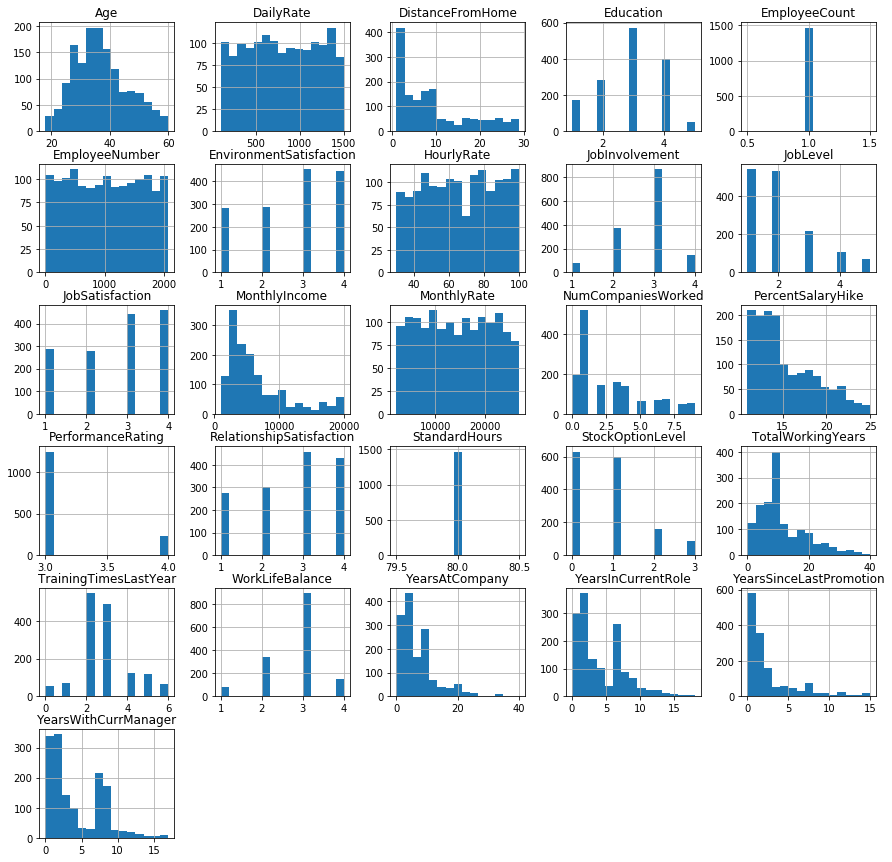

In [34]:
df.hist(bins = 15, figsize = (15,15))
plt.show()

##### Numerical features overview
A few observations can be made based on the information and histograms for numerical features:

Several numerical features are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

We can see that there are 1470 rows in total. Based on the information for ‘EmployeeCount’ it can be understood that it has a constant value of 1. So it will not be useful for model building. 

Also, ‘EmployeeNumber’ is an identifier and not particularly useful in modelling and prediction. 

Other unimportant attributes are ‘StandardHours’ (has constant value of 80) and ‘Over18’ (has value of ‘Yes’ for all rows). 

So we can drop all these columns from the data set.

In [35]:
#EmployeeCount , EmployeeNumber, Over18, StandardHours(All are above 80 so no use)

#Delete Unwanted Records
df.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours', 'Over18'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [36]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [151]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.915646,2.721769,0.600000,65.891156,2.729932,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.079401,1.093082,0.490065,20.329428,0.711561,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,...,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,2.000000,4.000000,1.000000,83.750000,3.000000,...,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,...,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Exploratory Data Analysis

#### EducationField
Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, 
Technical Degree, and a miscellaneous category 

In [38]:
# Education Field of employees
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [54]:
Field={'Life Sciences':2,'Medical':1,'Other':0,'Marketing':3,'Technical Degree':4,'Human Resources':5}
df.EducationField=[Field[item] for item in df.EducationField]

#### Marital Status
The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). 

In [40]:
# Marital Status of employees
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

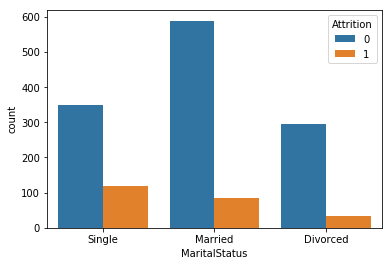

In [91]:
sns.countplot(data=df, x = 'MaritalStatus', hue="Attrition")
plt.show()

Attrition rate: Single > Married > Divorced

#### Distance from home
Distance from home for employees to get to work varies from 1 to 29 miles. 

In [41]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df['DistanceFromHome'].min(),
                                                                                       df['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


#### Department
The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [42]:
# The organisation consists of several departments
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

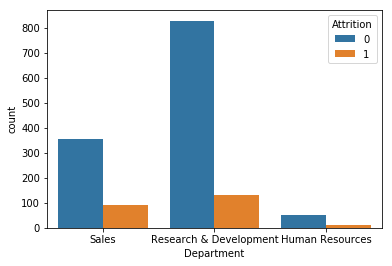

In [92]:
sns.countplot(data=df, x = 'Department', hue="Attrition")
plt.show()

Attrition Rate: Research & Department > Sales > Human Resources

#### Role and Work Condition

In [43]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

#### Job Role

In [44]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

#### Job Level
Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). 

In [45]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

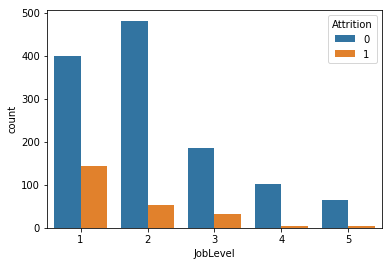

In [93]:
sns.countplot(data=df, x = 'JobLevel', hue="Attrition")
plt.show()

Attrition rate: 1 > 2 > 3 > 4 > 5 levels

#### Attrition

In [50]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [51]:
Attrition={'Yes':1,'No':0}
df.Attrition=[Attrition[item] for item in df.Attrition]

In [55]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

#### Gender

In [52]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [53]:
# creating a dict file 
Gender={'Male':1,'Female':0}
# traversing through dataframe Gender column and writing values where key matches
df.Gender=[Gender[item] for item in df.Gender]

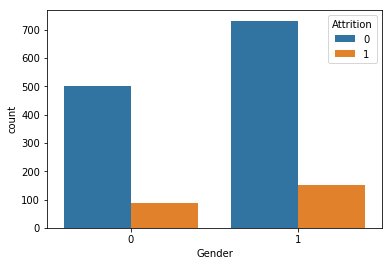

In [89]:
sns.countplot(data=df, x = 'Gender', hue="Attrition")
plt.show()

Attrition rate in female is less than in Male.

#### JobSatisfaction

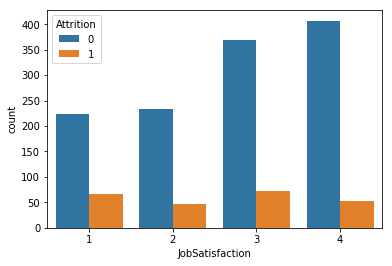

In [95]:
sns.countplot(data=df, x = 'JobSatisfaction', hue="Attrition")
plt.show()

Attrition rate: 3> 1> 4> 2

#### Number of Compnies Worked

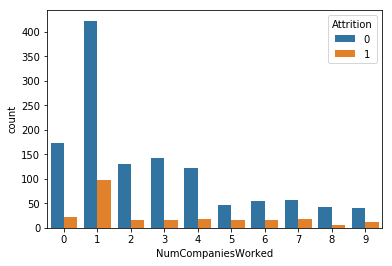

In [97]:
sns.countplot(data=df, x = 'NumCompaniesWorked', hue="Attrition")
plt.show()

Employees with 1 company has high attrition rate than others

#### Job Involvement

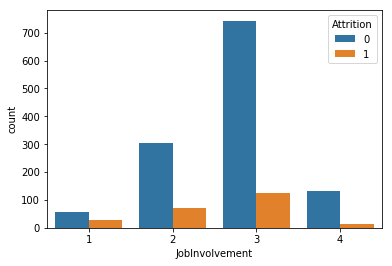

In [98]:
sns.countplot(data=df, x = 'JobInvolvement', hue="Attrition")
plt.show()

Attrition rate: Employees with job involvement high > medium > low > very high
    
May be employyes with very high job involvement has high number of experience ie. Senior employees

#### BusinessTravel

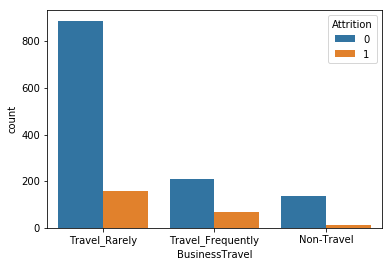

In [99]:
sns.countplot(data=df, x = 'BusinessTravel', hue="Attrition")
plt.show()

Employee who travel rarely leave the company > travel frequently > Non-Travel

In [56]:
#Summary based on Attrition
df1=df.groupby('Attrition')
df1.mean()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.871046,2.771290,0.593674,65.952149,2.770479,2.145985,...,15.231144,3.153285,2.733982,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.147679,2.464135,0.632911,65.573840,2.518987,1.637131,...,15.097046,3.156118,2.599156,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


#### Attrition Rate

In [59]:
#Attrition Rate

Attrition_Rate=df.Attrition.value_counts()/len(df)
Attrition_Rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

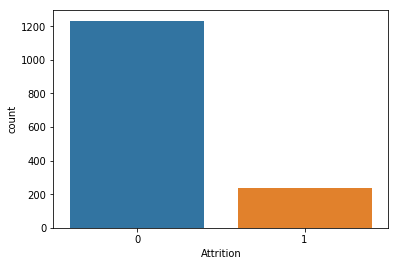

In [100]:
sns.countplot(data=df, x = 'Attrition')
plt.show()

Looks like about 83% of employees stayed and 16% of employees left

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.017366,0.010146,-0.036311,0.024287,0.029820,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,0.094277,-0.103369,0.029453,-0.006846,-0.130016,...,-0.013478,0.002889,-0.045872,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.031376,0.018355,-0.011716,0.023381,0.046135,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.000068,-0.016075,-0.001851,0.031131,0.008783,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.031530,-0.027128,-0.016547,0.016775,0.042438,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.017366,0.094277,-0.031376,0.000068,0.031530,1.000000,-0.006058,0.001802,0.021421,-0.009296,...,-0.057384,-0.034845,0.003102,-0.010969,-0.044946,0.001242,0.004016,0.021484,0.002208,0.008355
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,-0.006058,1.000000,0.000508,-0.049857,-0.008278,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,0.001802,0.000508,1.000000,-0.000478,0.017960,...,0.002733,-0.013859,0.022868,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.021421,-0.049857,-0.000478,1.000000,0.042861,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.009296,-0.008278,0.017960,0.042861,1.000000,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


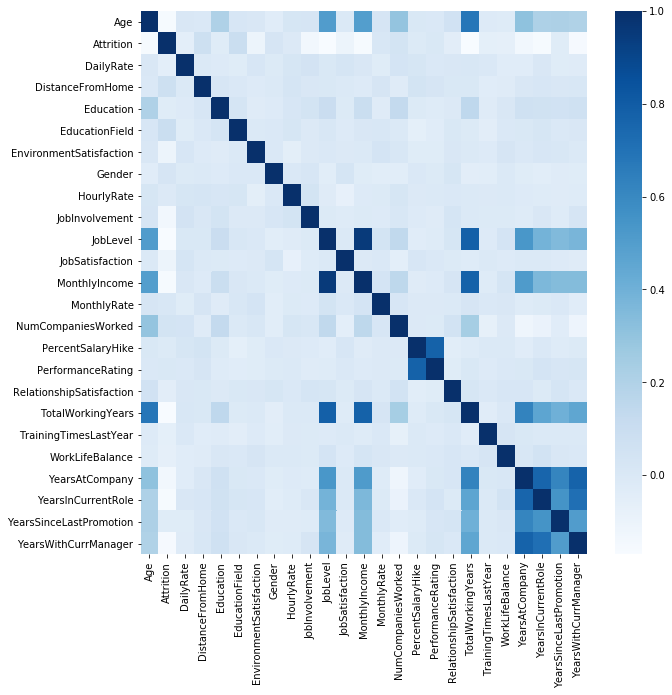

In [57]:
corr=df.corr()
corr=(corr)
plt.figure(figsize=(10, 10))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap='Blues')
corr

PerformanceRating is highly correlated with PercentSalaryHike.

MonthlyIncome is highly correlated with TotalWorkingYears.

YearInCurrentRole is highly correlated with YearsWithCurrManager.

TotalWorkingYears and YearsAtCompany are highly correlated.

Age is correlated with TotalWorkingYears

From the above correlation matrix we can see that Age and TotalWorkingYears are highly correlated as expected; so there should be little use in retaining both these atributes in the model. Similarly, MonthlyIncome and TotalWorkingYears seem to correlated as well. There are other attribute pairs with higher correlation coefficient such as TotalWOrkingYears & YearsAtCompany and YearsInCurrentRole & YearsWithCurrManager etc. Its better not to have dependent attributes in the model if they can individually provide value to the prediction model.

#### Employee income & Gender vs Attrition

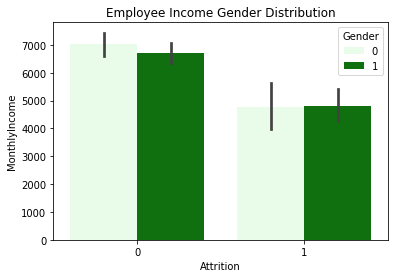

<Figure size 720x720 with 0 Axes>

In [62]:
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df,color='green').set_title('Employee Income Gender Distribution')
plt.figure(figsize=(10, 10))
plt.show()

Monthly income of Female and Male, leaving the company is almost equal.

Monthly income of Female, who stayed in the company is higher than Male.

#### DistanceFromHome & Gender vs Attrition

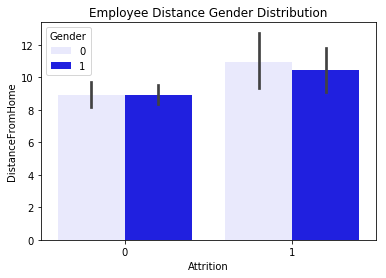

In [63]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df,color='blue').set_title('Employee Distance Gender Distribution')
plt.show()

Attrition Yes: DistanceFromHome of Female is greater than Male.

Attrition No: DistanceFromHome of Female and Male is almost equal.

Overall Distance of people leaving the company is higher than the people who stayed back. So, distance can be one of the factor.

#### Employee Salary vs Attrition

In [64]:
df['Income_Range']=pd.cut(df['MonthlyIncome'],[1000,5000,10000,15000,20000])

[]

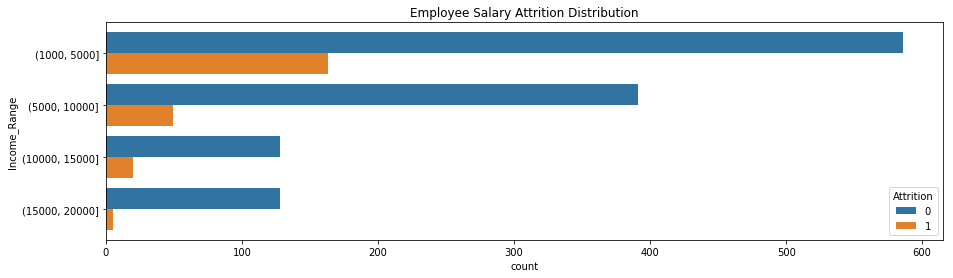

In [67]:
plt.subplots(figsize=(15, 4))
sns.countplot(y='Income_Range',hue='Attrition',data=df).set_title('Employee Salary Attrition Distribution')
plt.plot()

Attrition rate is higher for smaller income group. 

#### Employee Job Satisfaction Rating vs Attrition

Text(0.5, 1.0, 'Employee Job Satisfaction Rating - Attrition vs No Attrition')

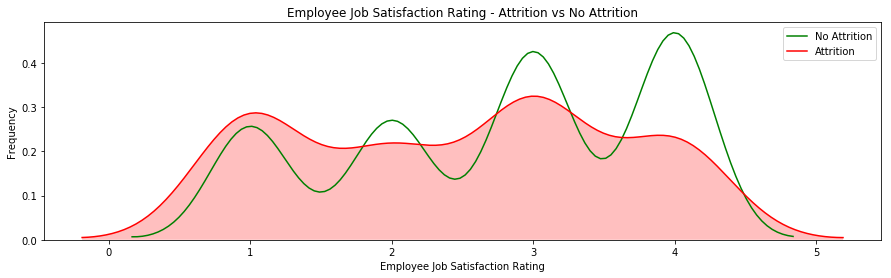

In [73]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'JobSatisfaction'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'JobSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee Job Satisfaction Rating',ylabel='Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

In [ ]:
Employee who stayed in the company are more job satisfied than the employee who left.

#### Employee WorkLifeBalance Rating vs Attrition

Text(0.5, 1.0, 'Employee WorkLifeBalance Rating - Attrition vs No Attrition')

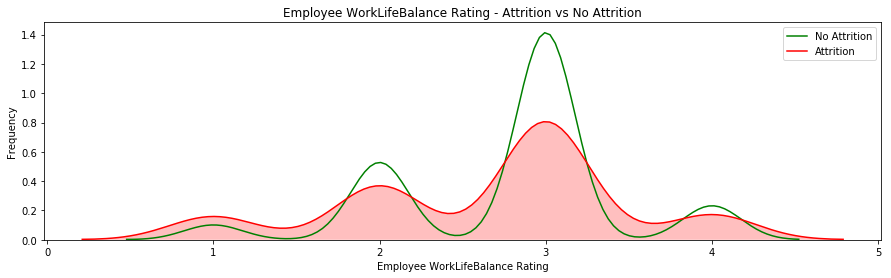

In [72]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'WorkLifeBalance'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'WorkLifeBalance'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee WorkLifeBalance Rating',ylabel='Frequency')
plt.title('Employee WorkLifeBalance Rating - Attrition vs No Attrition')

Histograms are a great way to start exploring a single variable drawn from one category. However, when we want to compare the distributions of one variable across multiple categories, histograms have issues with readability. 

There is mild increase in WorkLifeBalance of employees who stayed in the company then the employees who who left.

#### Employee Relationship Satisfaction vs Attrition

Text(0.5, 1.0, 'Employee Relationship Satisfaction Rating - Attrition vs No Attrition')

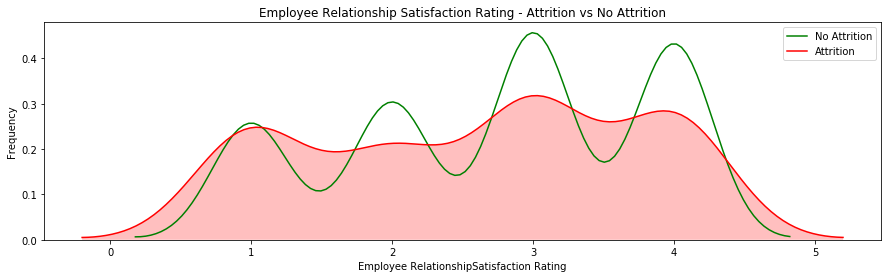

In [75]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'RelationshipSatisfaction'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'RelationshipSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee RelationshipSatisfaction Rating',ylabel='Frequency')
plt.title('Employee Relationship Satisfaction Rating - Attrition vs No Attrition')

#### Employee YearsAtCompany vs Attrition

Text(0.5, 1.0, 'Employee YearsAtCompany - Attrition vs No Attrition')

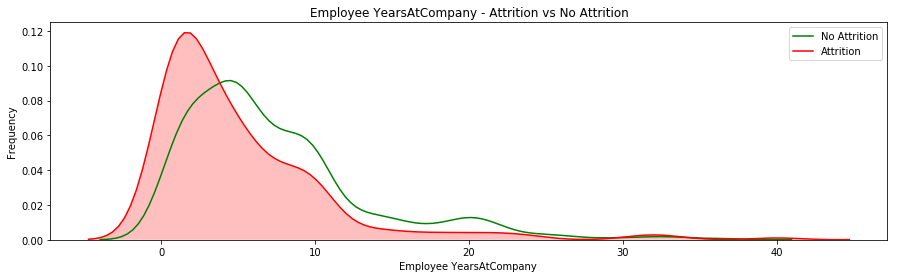

In [76]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'YearsAtCompany'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'YearsAtCompany'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee YearsAtCompany ',ylabel='Frequency')
plt.title('Employee YearsAtCompany - Attrition vs No Attrition')

Number of Employees with less yrs of experience are leaving the company than the employees with more yrs of experience.

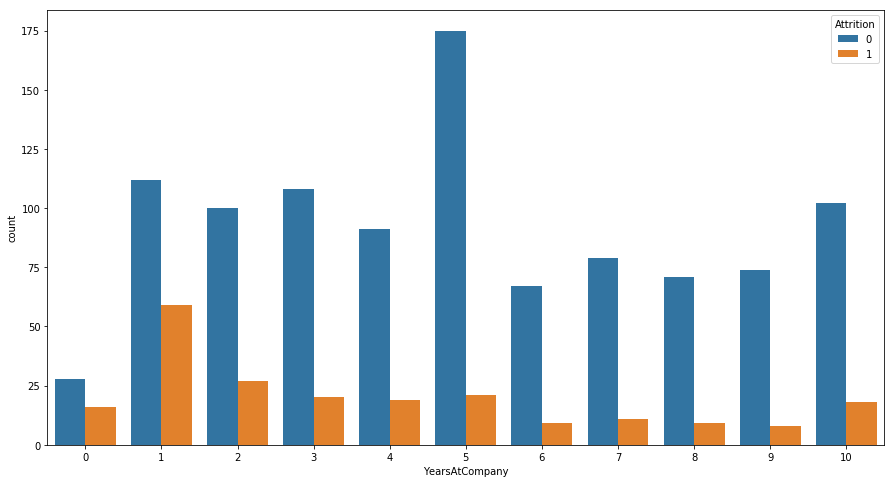

In [77]:
# Lets check for employees with less than 11 yrs of experience
fig=plt.figure(figsize=(15,8))
value=df['YearsAtCompany']<11
df3=df[value]
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df3)
plt.show()

Employees with (initial stage) 0 - 5 yrs of experince leaving the company.

#### Employee YearswithCurrentManager vs Attrition

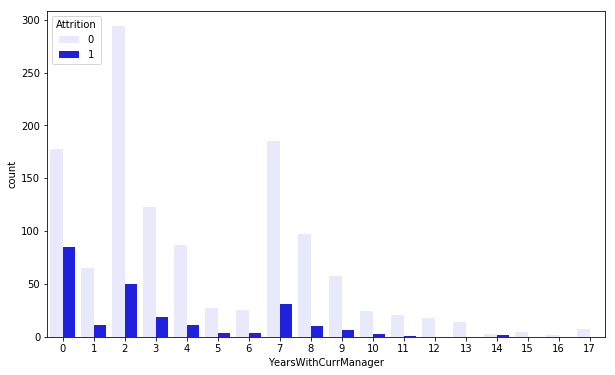

In [83]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df,color='blue')
plt.show()

Count of Employees with less number of YearsWithCurrManager leaving the company is more.

#### Employee YearsSinceLastPromotion vs Attrition

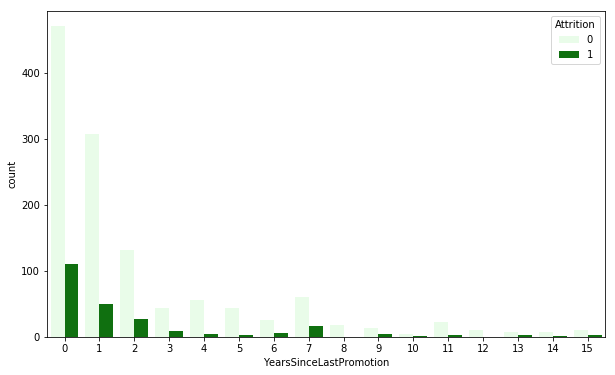

In [79]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,color='green')
plt.show()

Number of employees with more Years since last promotion is larger.

### Modeling the Data

In [101]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Income_Range'],
      dtype='object')

In [154]:
#Selecting numeric paremeters for Feature Engineering
data = df[['JobLevel', 'DistanceFromHome', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'YearsAtCompany', 
           'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating',
           'RelationshipSatisfaction','WorkLifeBalance','Attrition', 'TotalWorkingYears' ]]

#### Modelling using Decision Tree

In [182]:
# Separating the Target and the Predictors

X = data[['JobLevel','MonthlyIncome','JobInvolvement','JobSatisfaction', 'RelationshipSatisfaction']]
y = data[['Attrition']]

# Train-Test Split (Stratified Sampling of Y)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, stratify=y, random_state = 100)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [183]:
#Making Prediction
y_pred = clf_gini.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [184]:
#Overall Accuracy
acc = (c[0,0]+c[1,1])/np.sum(c)*100

print("Confusion Matrix is:\n ",c)

Confusion Matrix is:
  [[362   8]
 [ 68   3]]


In [185]:
# Confusion Matrix
c = confusion_matrix(y_test, y_pred)

print("Overall Accuracy is ", acc)

Overall Accuracy is  82.76643990929705


Text(0.5, 1.0, 'Confusion matrix of the classifier')

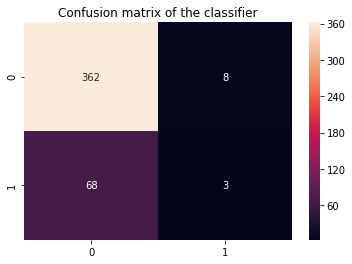

In [211]:
sns.heatmap(c, annot = True, fmt = "d")
# sns.palplot(sns.color_palette("husl", 8))
plt.title('Confusion matrix of the classifier')

In [188]:
#Sensitivity: True positive rate
362/(362+68+8+3)*100

82.08616780045351

In [189]:
#RMSE
np.sqrt(np.mean((np.array(y_test)-y_pred)**2))

0.42179308929111736